In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [394]:
# Load the data into a pandas DataFrame (replace the file path with your own)

clients = pd.read_csv('clients.csv')
questions = pd.read_csv('questions.csv')
questions_post = pd.read_csv('questionposts.csv', on_bad_lines='skip')

C:\Users\Gustavo Aniceto\AppData\Local\Temp\ipykernel_5788\64431001.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  questions_post = pd.read_csv('questionposts.csv', on_bad_lines='skip')


In [395]:
questions_post_with_client_uno = pd.merge(questions_post, questions, left_on='QuestionUno', right_on='QuestionUno')

In [396]:


# Convert 'AskedOnUtc' to datetime format
questions['AskedOnUtc'] = pd.to_datetime(questions['AskedOnUtc'])

# Extract year and month from 'AskedOnUtc' to facilitate analysis over time
questions['Year'] = questions['AskedOnUtc'].dt.year
questions['Month'] = questions['AskedOnUtc'].dt.month

# Count the number of questions by category and subcategory over time
category_counts = questions.groupby(['Year', 'Month', 'Category', 'Subcategory']).size().reset_index(name='Count')

# Sort the data by year and month to analyze trends over time
category_counts = category_counts.sort_values(['Year', 'Month'])

# Create a 'Year-Month' column for better visualization
category_counts['Year-Month'] = category_counts['Year'].astype(str) + '-' + category_counts['Month'].astype(str)

In [397]:
category_counts

,Year,Month,Category,Subcategory,Count,Year-Month
0,2012,10,Consumer Financial Questions,Bankruptcy,1,2012-10
1,2012,10,Family and Children,Family Law Questions,2,2012-10
2,2012,11,Consumer Financial Questions,Bankruptcy or Debtor Relief Cases,1,2012-11
3,2012,11,Consumer Financial Questions,Collections Case,1,2012-11
4,2012,11,Family and Children,Custody & Visitation issues,2,2012-11
...,...,...,...,...,...,...
13075,2022,1,"Work, Employment and Unemployment","Work, Employment, Unemployment",1,2022-1
13076,2022,1,"Work, Employment and Unemployment","Work, Employment, or Unemployment",4,2022-1
13077,2022,1,"Work, Employment and Unemployment",Work/Employment,1,2022-1
13078,2022,1,"Work, Employment and Unemployment",Work/Employment/Unemployment,52,2022-1


<Figure size 1500x800 with 0 Axes>

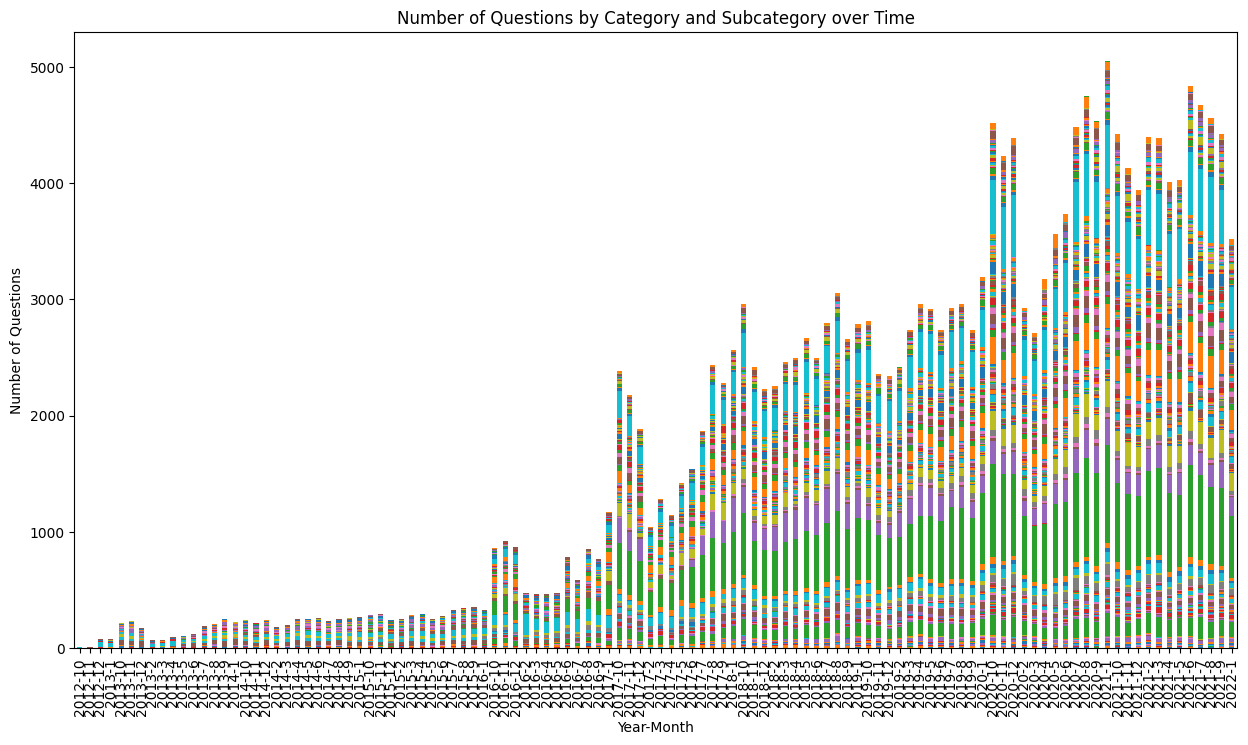

In [398]:
pivot_df = category_counts.pivot_table(index='Year-Month', columns=['Category', 'Subcategory'], values='Count', fill_value=0)

# Reset the index to include 'Year-Month' in the DataFrame
pivot_df.reset_index(inplace=True)

# Plot the data
plt.figure(figsize=(15, 8))
ax = pivot_df.plot(kind='bar', x='Year-Month', stacked=True, figsize=(15, 8))
plt.xlabel('Year-Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Category and Subcategory over Time')
plt.legend('',frameon=False)
plt.show()

In [399]:
# Get the top 3 most common subcategories
top_5_subcategories = category_counts.groupby('Subcategory')['Count'].sum().nlargest(5).index

# Filter the data to include only the top 3 subcategories
filtered_top_5_category_counts = category_counts[category_counts['Subcategory'].isin(top_5_subcategories)]

# Sort the data by year and month to analyze trends over time
filtered_top_5_category_counts = filtered_top_5_category_counts.sort_values(['Year', 'Month'])

# Create a 'Year-Month' column for better visualization
filtered_top_5_category_counts['Year-Month'] = filtered_top_5_category_counts['Year'].astype(str) + '-' + filtered_top_5_category_counts['Month'].astype(str)

# Pivot the data for visualization
pivot_top_5_df = filtered_top_5_category_counts.pivot_table(index='Year-Month', columns=['Category', 'Subcategory'], values='Count', fill_value=0)

# Reset the index to include 'Year-Month' in the DataFrame
pivot_top_5_df.reset_index(inplace=True)

<Figure size 1500x800 with 0 Axes>

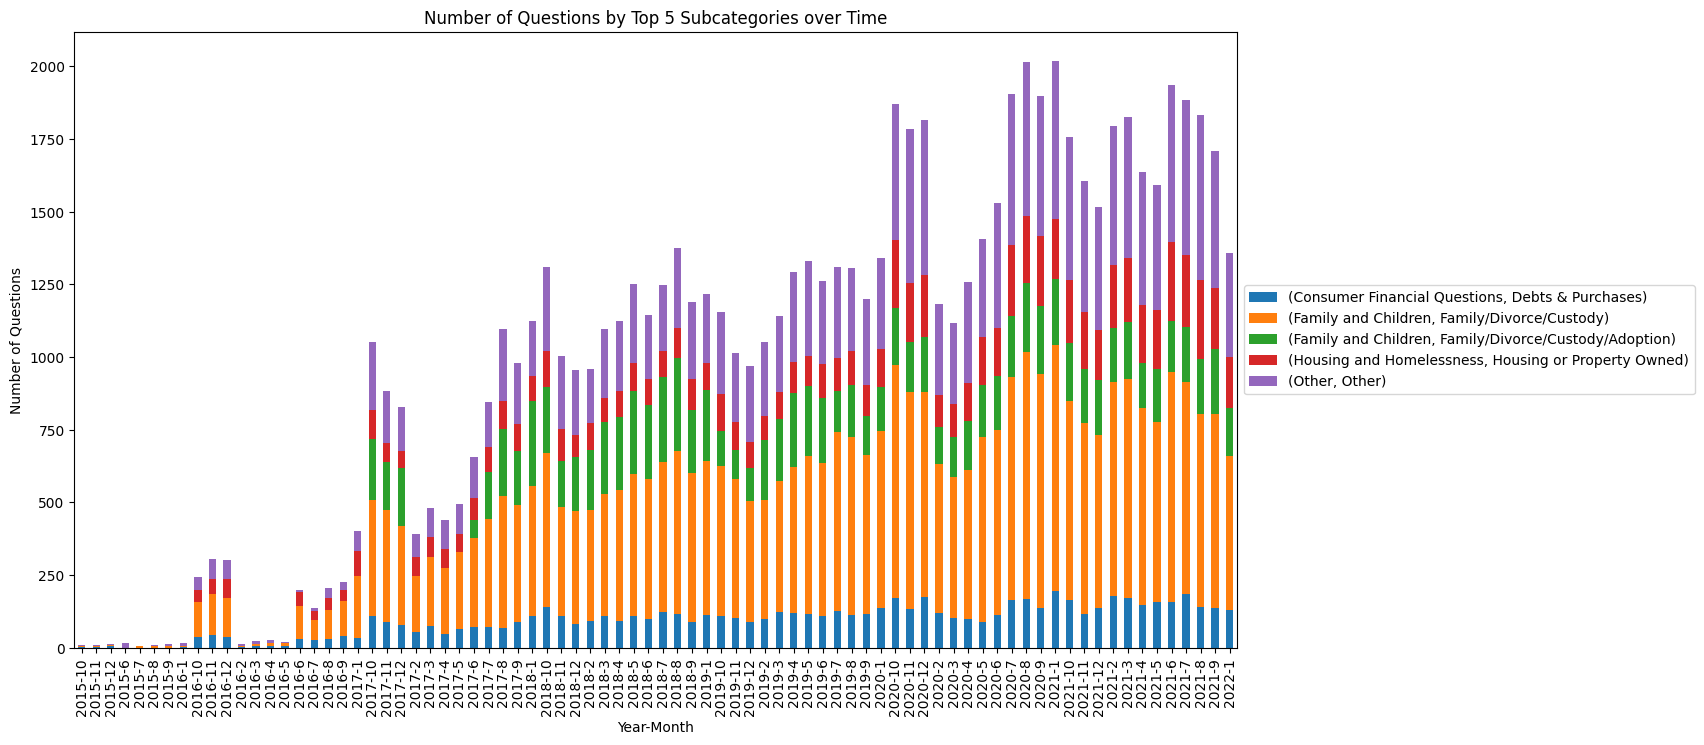

In [400]:
# Plot the data for the top 3 subcategories
plt.figure(figsize=(15, 8))
ax = pivot_top_5_df.plot(kind='bar', x='Year-Month', stacked=True, figsize=(15, 8))
plt.xlabel('Year-Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Top 5 Subcategories over Time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Based on the provided visualization, we can make the following observations:

"Housing" and "Family" categories are consistently the most common issues, with "Housing" questions dominating the dataset.

The number of questions related to "Housing" experienced a significant increase between 2020-09 and 2021-01. This could potentially be attributed to the COVID-19 pandemic, as people faced financial difficulties and housing issues during that period.

While the number of "Housing" questions has decreased since its peak, it remains the most prevalent category.

The number of questions related to "Family" issues has remained relatively steady over time.

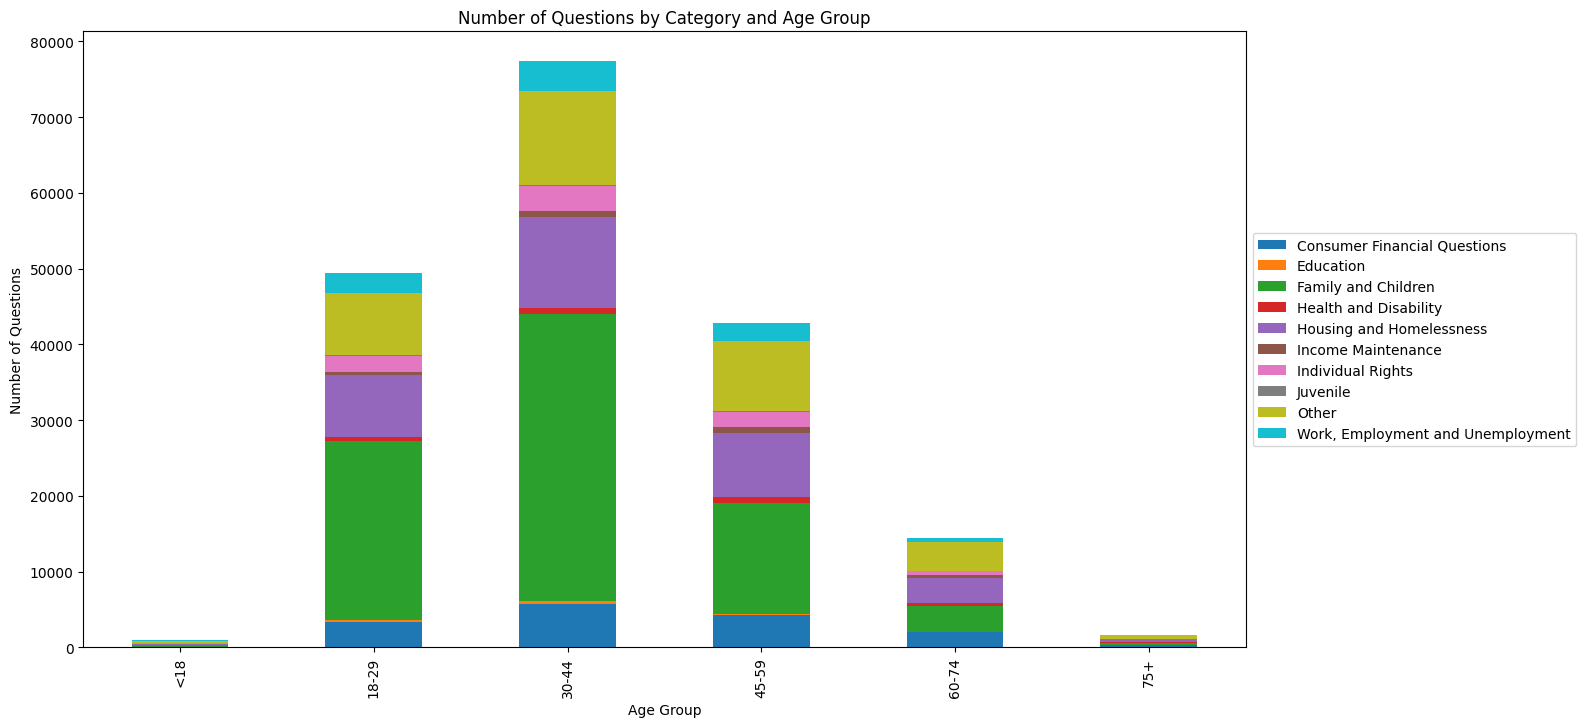

In [401]:
# Merge the Clients and Questions datasets
merged_df = pd.merge(clients, questions, left_on='ClientUno', right_on='AskedByClientUno')

# Create age bins for better visualization
age_bins = [0, 18, 30, 45, 60, 75, np.inf]
age_labels = ['<18', '18-29', '30-44', '45-59', '60-74', '75+']

merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# Create a crosstab showing the distribution of categories across different age groups
category_age_crosstab = pd.crosstab(merged_df['AgeGroup'], merged_df['Category'])

# Plot the crosstab as a stacked bar chart
ax = category_age_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Age Group')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Category and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The distribution of categories is similar across different age groups, with "Housing" and "Family" being the most common issues for all age groups.

The number of questions tends to decrease as the age of the clients increases, which could be due to various factors, such as lower usage of the platform by older individuals or decreased need for legal assistance in certain areas.

Let's analyze the relationship between the clients' gender and the types of questions they ask. We'll create a crosstab to show the distribution of categories for different genders:

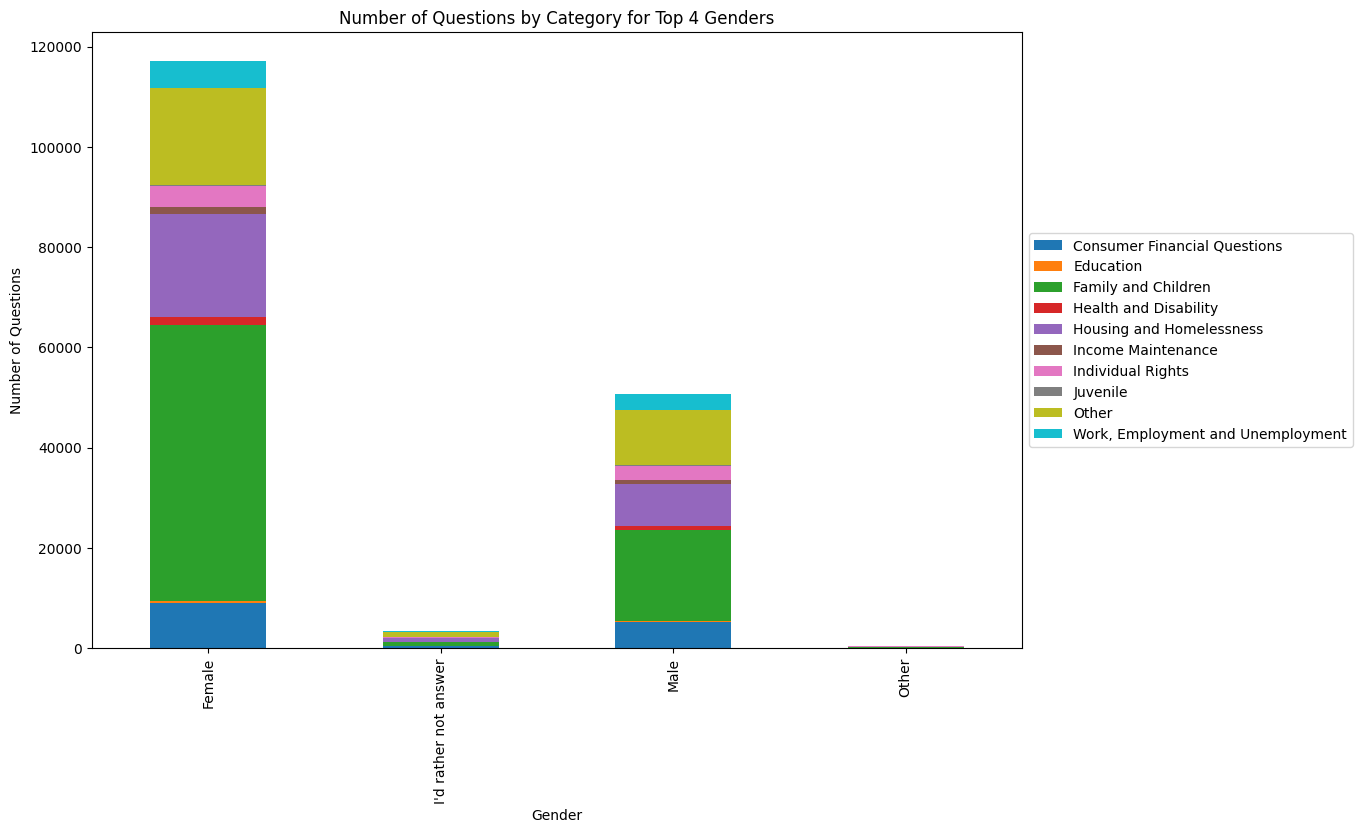

In [402]:
# Find the top 4 most common genders
top_genders = merged_df['Gender'].value_counts().nlargest(4).index

# Filter the merged_df to include only the top 4 most common genders
filtered_merged_df = merged_df[merged_df['Gender'].isin(top_genders)]

# Create a crosstab showing the distribution of categories across the top 4 most common genders
category_gender_crosstab = pd.crosstab(filtered_merged_df['Gender'], filtered_merged_df['Category'])

# Plot the crosstab as a stacked bar chart
ax = category_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Gender')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Category for Top 4 Genders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Based on the provided visualization, we can observe the following:

The distribution of categories is quite similar across the top 4 most common genders, with "Housing" and "Family" being the most common issues for all these genders.

The number of questions varies significantly across genders, with one gender having a much higher number of questions than the others.

Now, let's analyze the relationship between clients' ethnic identities and the types of questions they ask. We'll create a crosstab to show the distribution of categories for different ethnic identities:

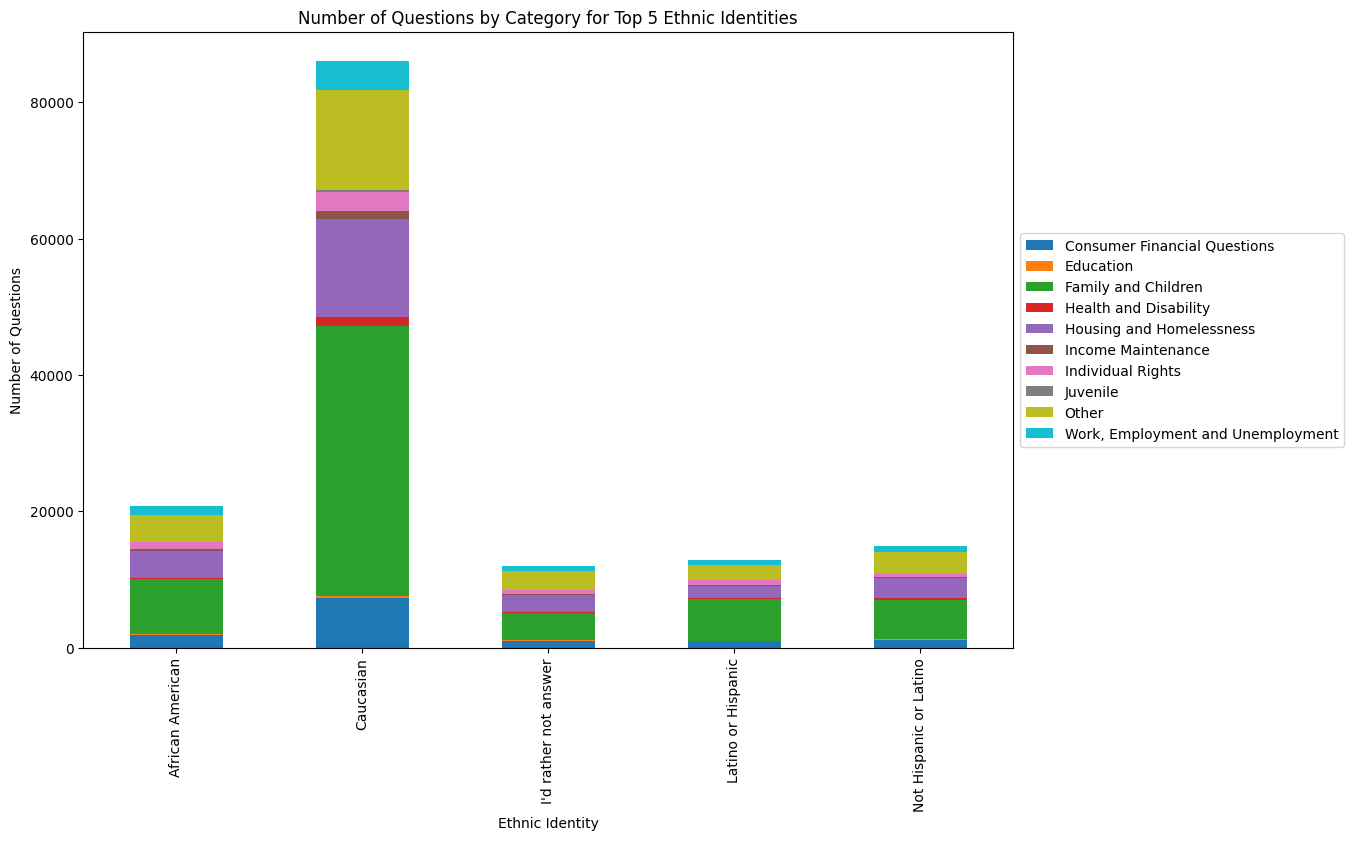

In [403]:
# Find the top 5 most common ethnic identities
top_ethnicities = merged_df['EthnicIdentity'].value_counts().nlargest(5).index

# Filter the merged_df to include only the top 5 most common ethnic identities
filtered_merged_df = merged_df[merged_df['EthnicIdentity'].isin(top_ethnicities)]

# Create a crosstab showing the distribution of categories across the top 5 most common ethnic identities
category_ethnicity_crosstab = pd.crosstab(filtered_merged_df['EthnicIdentity'], filtered_merged_df['Category'])

# Plot the crosstab as a stacked bar chart
ax = category_ethnicity_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Ethnic Identity')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Category for Top 5 Ethnic Identities')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The distribution of categories is quite similar across the top 5 most common ethnic identities, with "Housing" and "Family" being the most common issues for all these ethnic groups.

The number of questions varies significantly across ethnic identities, with some ethnic groups having a much higher number of questions than the others.

In [404]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import LdaMulticore
import nltk
import gensim

In [405]:
# Preprocess the text
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    wordnet_lemmatizer = WordNetLemmatizer()

    # Tokenize, remove stop words, and lemmatize
    words = word_tokenize(text.lower())
    words = [wordnet_lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]

    return words

In [406]:
question_posts_with_info = questions_post.merge(questions, left_on='QuestionUno', right_on='QuestionUno').merge(clients, left_on='AskedByClientUno', right_on='ClientUno')

In [407]:
sorted_data = question_posts_with_info.sort_values(['ClientUno', 'Id_x'])
def separate_questions_and_answers(posts):
    questions = posts.iloc[::2].astype(str).tolist()
    answers = posts.iloc[1::2].astype(str).tolist()
    
    # Pad lists with None if they have different lengths
    if len(questions) > len(answers):
        answers.extend([None] * (len(questions) - len(answers)))
    elif len(answers) > len(questions):
        questions.extend([None] * (len(answers) - len(questions)))

    return pd.Series({'ClientQuestions': '\n\n'.join(filter(None, questions)), 'AttorneyAnswers': '\n\n'.join(filter(None, answers))})



In [409]:
float_rows = client_questions_df.loc[questions_post['PostText'].apply(lambda x: isinstance(x, float))]
questions_post = client_questions_df.dropna(subset=['PostText'])

questions_post['ProcessedText'] = questions_post['PostText'].apply(preprocess_text)


In [410]:
# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(questions_post['ProcessedText'])
corpus = [dictionary.doc2bow(text) for text in questions_post['ProcessedText']]

In [411]:
# Perform LDA
num_topics = 5
lda_model = LdaMulticore(corpus, num_topics=10,id2word=dictionary, workers=32, passes=15, random_state=34)


In [412]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

C:\Users\Gustavo Aniceto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [413]:
def get_dominant_topic(ldamodel, corpus, texts):
    topic_assignments = []
    for i, row_list in enumerate(ldamodel[corpus]):
        row = sorted(row_list, key=lambda x: x[1], reverse=True)
        topic_num, prop_topic = row[0]
        topic_assignments.append((texts[i], topic_num, prop_topic))
        
    return pd.DataFrame(topic_assignments, columns=['Text', 'Dominant_Topic', 'Topic_Probability'])

# Get the dominant topic for each document
df_topic_assignments = get_dominant_topic(lda_model, corpus, questions_post['ProcessedText'].tolist())

# Create a dictionary to map topic numbers to their labels
topic_labels = {
    0: 'Custody Law',
    1: 'Hearing Advice',
    2: 'Family Matters',
    3: 'Property Law',
    4: 'Housing and Real Estate',
    5:  'Employmment Law',
    6: 'Property Law',
    7: 'Medical Trouble',
    8: 'Divorce Law',
    9: 'Technical Law Questions',
}

df_topic_assignments['Topic_Label'] = df_topic_assignments['Dominant_Topic'].map(topic_labels)
questions_post = questions_post.merge(df_topic_assignments, left_index=True, right_index=True)



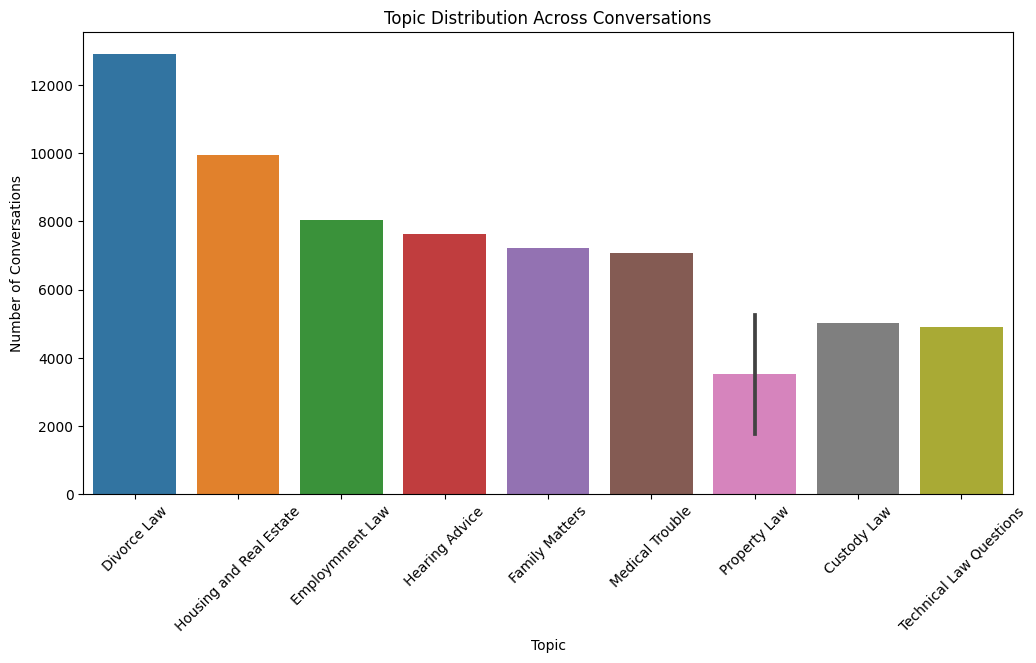

In [414]:
# Count the number of conversations for each topic
topic_counts = questions_post['Dominant_Topic'].value_counts().reset_index()
topic_counts.columns = ['Dominant_Topic', 'Num_Conversations']

# Replace the topic numbers with their labels
topic_counts['Dominant_Topic'] = topic_counts['Dominant_Topic'].replace(topic_labels)

# Create a bar chart to visualize the topic distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Dominant_Topic', y='Num_Conversations', data=topic_counts)
plt.title('Topic Distribution Across Conversations')
plt.xlabel('Topic')
plt.ylabel('Number of Conversations')
plt.xticks(rotation=45)
plt.show()



In [419]:
questions_post

,ClientUno,Type,PostText,ProcessedText,Text,Dominant_Topic,Topic_Probability,Topic_Label
0,000005F5-A21D-40EA-A242-0CA3C46C0815,ClientQuestions,"Hi, I'm a single mom of ###. Recently there Da...","[hi, single, mom, recently, dad, decided, brin...","[hi, single, mom, recently, dad, decided, brin...",9,0.356942,Technical Law Questions
2,00000D61-F53C-4347-9FA5-F24888D61390,ClientQuestions,"My oldest daughter is 19yrs old, lives with me...","[oldest, daughter, old, life, since, turned, w...","[yesterday, fbi, showed, door, three, men, bla...",6,0.427705,Property Law
4,0000AFD0-5F95-478B-8F32-E3041A55A345,ClientQuestions,Yesterday the FBI showed up at my door. Three ...,"[yesterday, fbi, showed, door, three, men, bla...","[greeting, due, high, risk, pregnancy, went, l...",0,0.426921,Custody Law
6,0001036B-B56D-48E7-BB60-4E64BA5F8B7D,ClientQuestions,I need a lawyer,"[need, lawyer]","[going, receive, future, default, judgement, s...",4,0.975194,Housing and Real Estate
8,00011515-11DE-456C-A031-1342D1B4C969,ClientQuestions,"Greetings, Due to a high risk pregnancy, I wen...","[greeting, due, high, risk, pregnancy, went, l...","[judge, signed, proposed, parenting, plan, nea...",1,0.550393,Hearing Advice
...,...,...,...,...,...,...,...,...
139554,7FA9A177-E345-427C-81CA-C6CF5DB982D6,ClientQuestions,Iâ€™m interested in divorce and Iâ€™m wonderin...,"[interested, divorce, wondering, much, cost, g...","[case, number, filed, divorce, wife, missed, f...",2,0.743449,Family Matters
139556,7FA9AEFC-A27A-437A-9ABA-7CE2CD70D923,ClientQuestions,You guys did my divorce while I was in prison ...,"[guy, divorce, prison, trying, find, final]","[vehicle, recently, repossessed, missed, payme...",9,0.584294,Technical Law Questions
139558,7FAA1CC3-C2B4-48A6-B453-0A32F2FEF753,ClientQuestions,I am living with the father of said ### ###. I...,"[living, father, said, one, child, watched, tw...","[hello, well, filed, custody, paper, year, ago...",5,0.534385,Employmment Law
139560,7FAA4D8A-E12E-430D-BA8D-E9CB174E9D82,ClientQuestions,Parole eligibility was ### ###17. She has bee...,"[parole, eligibility, incarcerated, time, sinc...","[purchased, land, contract, home, family, memb...",4,0.889901,Housing and Real Estate


In [420]:
questions_post_with_client_uno = pd.merge(questions_post, questions, left_on='ClientUno', right_on='AskedByClientUno')


In [421]:
questions_post_with_client_uno

,ClientUno,Type,PostText,ProcessedText,Text,Dominant_Topic,Topic_Probability,Topic_Label,Id,StateAbbr,...,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,Year,Month
0,000005F5-A21D-40EA-A242-0CA3C46C0815,ClientQuestions,"Hi, I'm a single mom of ###. Recently there Da...","[hi, single, mom, recently, dad, decided, brin...","[hi, single, mom, recently, dad, decided, brin...",9,0.356942,Technical Law Questions,157431,LA,...,Family/Divorce/Custody,000005F5-A21D-40EA-A242-0CA3C46C0815,2019-10-21 15:28:32,ED76E01E-EDD8-41AC-AF98-24E9E5536A1D,2019-10-23 19:00:30,ED76E01E-EDD8-41AC-AF98-24E9E5536A1D,2019-11-02 19:10:23,2019-11-19 00:00:00,2019,10
1,00000D61-F53C-4347-9FA5-F24888D61390,ClientQuestions,"My oldest daughter is 19yrs old, lives with me...","[oldest, daughter, old, life, since, turned, w...","[yesterday, fbi, showed, door, three, men, bla...",6,0.427705,Property Law,163379,IN,...,Child Support,00000D61-F53C-4347-9FA5-F24888D61390,2021-05-10 18:14:00,B162E55A-9445-476D-BFDD-008EAABD61B6,2021-05-10 19:13:01,B162E55A-9445-476D-BFDD-008EAABD61B6,2021-05-21 13:20:36,NaN,2021,5
2,0000AFD0-5F95-478B-8F32-E3041A55A345,ClientQuestions,Yesterday the FBI showed up at my door. Three ...,"[yesterday, fbi, showed, door, three, men, bla...","[greeting, due, high, risk, pregnancy, went, l...",0,0.426921,Custody Law,91474,WI,...,Civil Rights,0000AFD0-5F95-478B-8F32-E3041A55A345,2020-06-09 18:36:06,309091EC-9D25-4083-A668-F06A915CAA28,2020-06-10 14:13:16,309091EC-9D25-4083-A668-F06A915CAA28,2020-06-21 00:17:40,NaN,2020,6
3,0001036B-B56D-48E7-BB60-4E64BA5F8B7D,ClientQuestions,I need a lawyer,"[need, lawyer]","[going, receive, future, default, judgement, s...",4,0.975194,Housing and Real Estate,74837,TX,...,Family/Divorce/Custody/Adoption,0001036B-B56D-48E7-BB60-4E64BA5F8B7D,2020-10-15 15:01:40,511B5566-7E02-46C2-A00A-163F790743FB,2020-10-17 14:35:23,511B5566-7E02-46C2-A00A-163F790743FB,2020-10-27 14:52:27,2020-11-11 00:00:00,2020,10
4,00011515-11DE-456C-A031-1342D1B4C969,ClientQuestions,"Greetings, Due to a high risk pregnancy, I wen...","[greeting, due, high, risk, pregnancy, went, l...","[judge, signed, proposed, parenting, plan, nea...",1,0.550393,Hearing Advice,56346,CA,...,Wildfire or COVID-19: Employment Law,00011515-11DE-456C-A031-1342D1B4C969,2020-09-19 00:00:18,1C50F9C0-6417-4B0E-8F3B-AE823D232C4C,2020-09-21 23:27:05,1C50F9C0-6417-4B0E-8F3B-AE823D232C4C,2020-09-22 22:28:49,2020-09-29 00:00:00,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81082,7FAA1CC3-C2B4-48A6-B453-0A32F2FEF753,ClientQuestions,I am living with the father of said ### ###. I...,"[living, father, said, one, child, watched, tw...","[hello, well, filed, custody, paper, year, ago...",5,0.534385,Employmment Law,193831,FL,...,Guardianship,7FAA1CC3-C2B4-48A6-B453-0A32F2FEF753,2020-08-02 06:37:31,B68EB95B-020E-48C0-9B8F-D45BC98A27B7,2020-08-03 16:05:08,B68EB95B-020E-48C0-9B8F-D45BC98A27B7,2020-08-05 16:20:24,NaN,2020,8
81083,7FAA4D8A-E12E-430D-BA8D-E9CB174E9D82,ClientQuestions,Parole eligibility was ### ###17. She has bee...,"[parole, eligibility, incarcerated, time, sinc...","[purchased, land, contract, home, family, memb...",4,0.889901,Housing and Real Estate,131770,TN,...,Civil/Constitutional Rights,7FAA4D8A-E12E-430D-BA8D-E9CB174E9D82,2017-09-16 20:38:09,NaN,NaN,NaN,2017-09-27 14:56:49,NaN,2017,9
81084,7FAA4D8A-E12E-430D-BA8D-E9CB174E9D82,ClientQuestions,Parole eligibility was ### ###17. She has bee...,"[parole, eligibility, incarcerated, time, sinc...","[purchased, land, contract, home, family, memb...",4,0.889901,Housing and Real Estate,131799,TN,...,Other,7FAA4D8A-E12E-430D-BA8D-E9CB174E9D82,2017-09-21 22:02:11,NaN,NaN,NaN,2017-09-21 22:02:41,NaN,2017,9
81085,7FAA4D8A-E12E-430D-BA8D-E9CB174E9D82,ClientQuestions,Parole eligibility was ### ###17. She has bee...,"[parole, eligibility, incarcerated, time, sinc...","[purchased, land, contract, home, family, 

In [422]:
merged_df = pd.merge(questions_post_with_client_uno, clients, left_on='AskedByClientUno', right_on='ClientUno')
gender_topic_distribution = merged_df.groupby(['Gender', 'Topic_Label']).size().unstack(fill_value=0)
ethnic_topic_distribution = merged_df.groupby(['EthnicIdentity', 'Topic_Label']).size().unstack(fill_value=0)
age_topic_distribution = merged_df.groupby(['Age', 'Topic_Label']).size().unstack(fill_value=0)
marital_status_topic_distribution = merged_df.groupby(['MaritalStatus', 'Topic_Label']).size().unstack(fill_value=0)


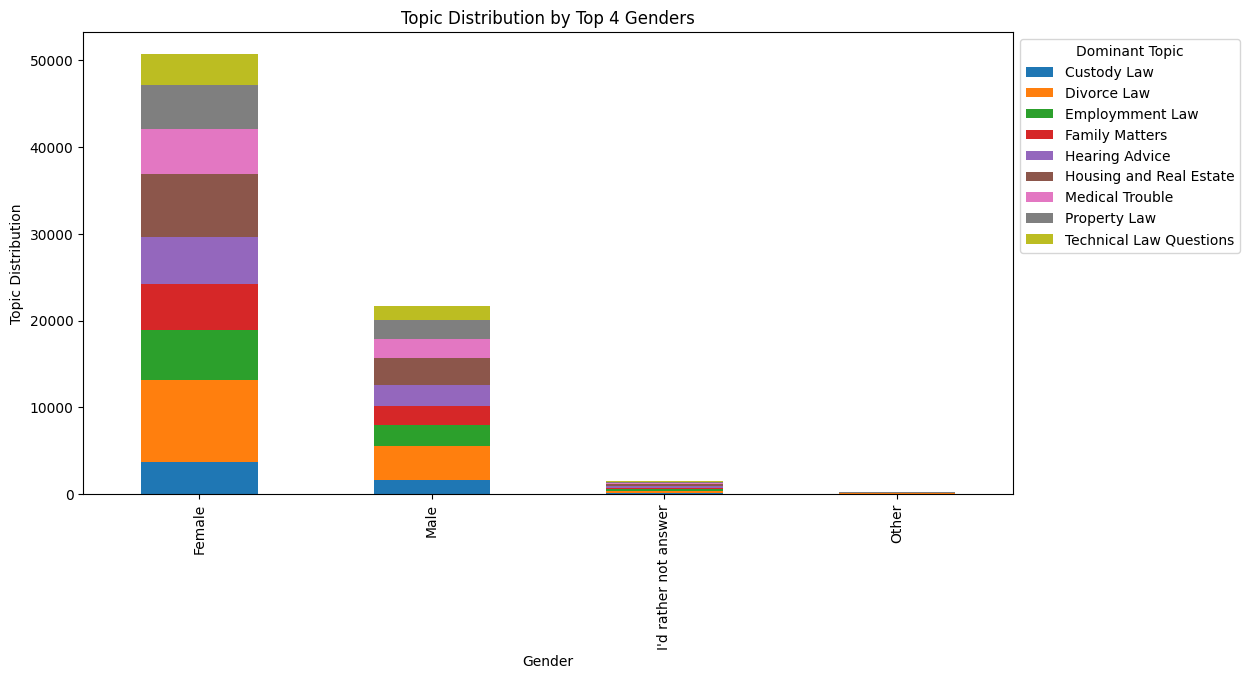

In [423]:
# Get the top 4 genders by total count
top_genders = gender_topic_distribution.sum(axis=1).nlargest(4).index

# Filter the gender_topic_distribution to keep only the top 4 genders
top_gender_topic_distribution = gender_topic_distribution.loc[top_genders]

# Create a bar plot for the top 4 genders and their topic distributions
ax = top_gender_topic_distribution.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Topic Distribution by Top 4 Genders')
plt.xlabel('Gender')
plt.ylabel('Topic Distribution')
plt.legend(title='Dominant Topic', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

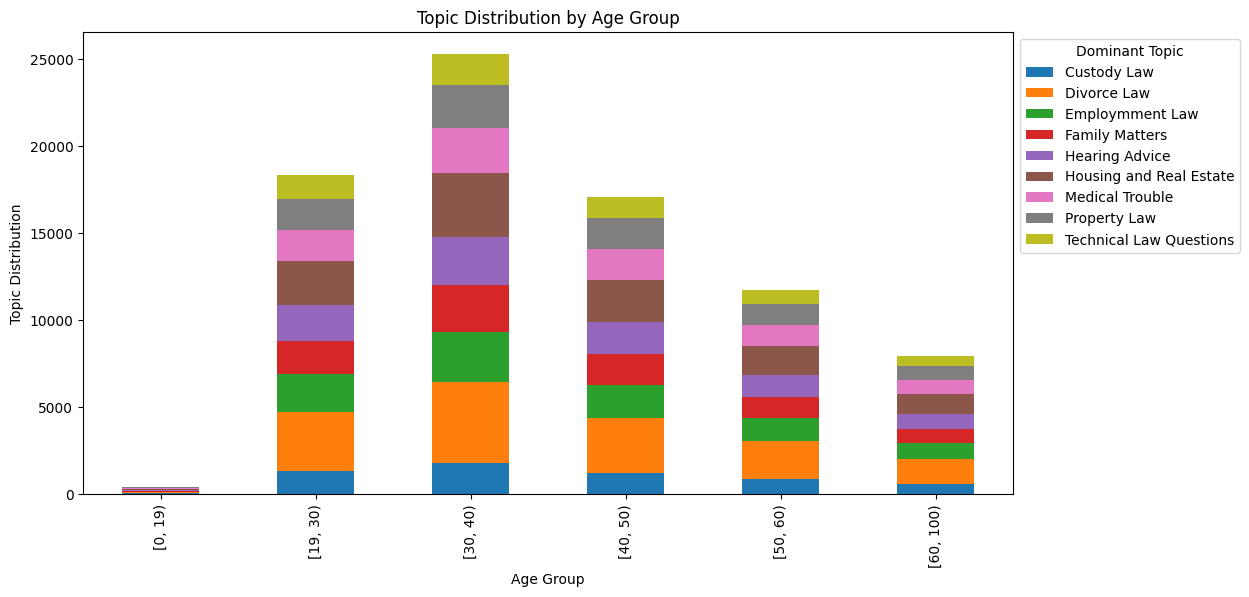

In [424]:
# Define age group boundaries
age_bins = [0, 19, 30, 40, 50, 60, 100]

# Assign age groups to the 'AgeGroup' column
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=age_bins, right=False)

# Calculate the topic distribution by age group
age_group_topic_distribution = merged_df.groupby(['AgeGroup', 'Topic_Label']).size().unstack(fill_value=0)

# Create a bar plot for the topic distribution by age group
ax = age_group_topic_distribution.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Topic Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Topic Distribution')
plt.legend(title='Dominant Topic', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

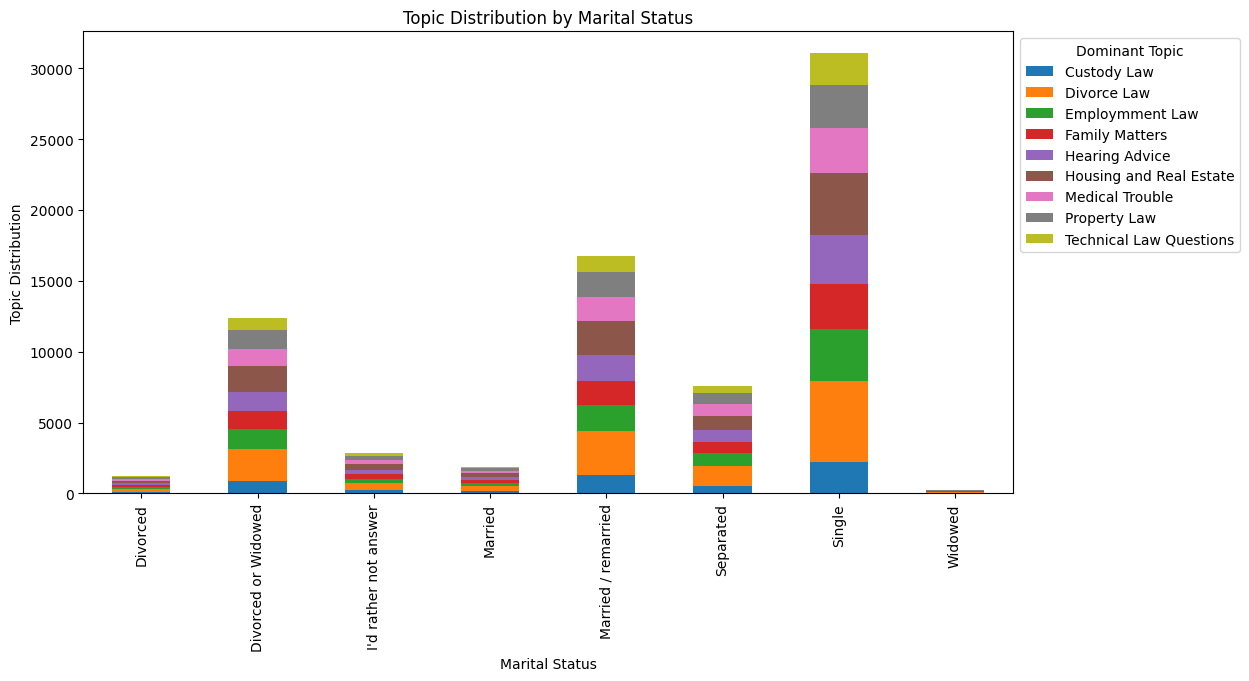

In [425]:
# Calculate the topic distribution by marital status
marital_status_topic_distribution = merged_df.groupby(['MaritalStatus', 'Topic_Label']).size().unstack(fill_value=0)

# Create a bar plot for the topic distribution by marital status
ax = marital_status_topic_distribution.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Topic Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Topic Distribution')
plt.legend(title='Dominant Topic', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

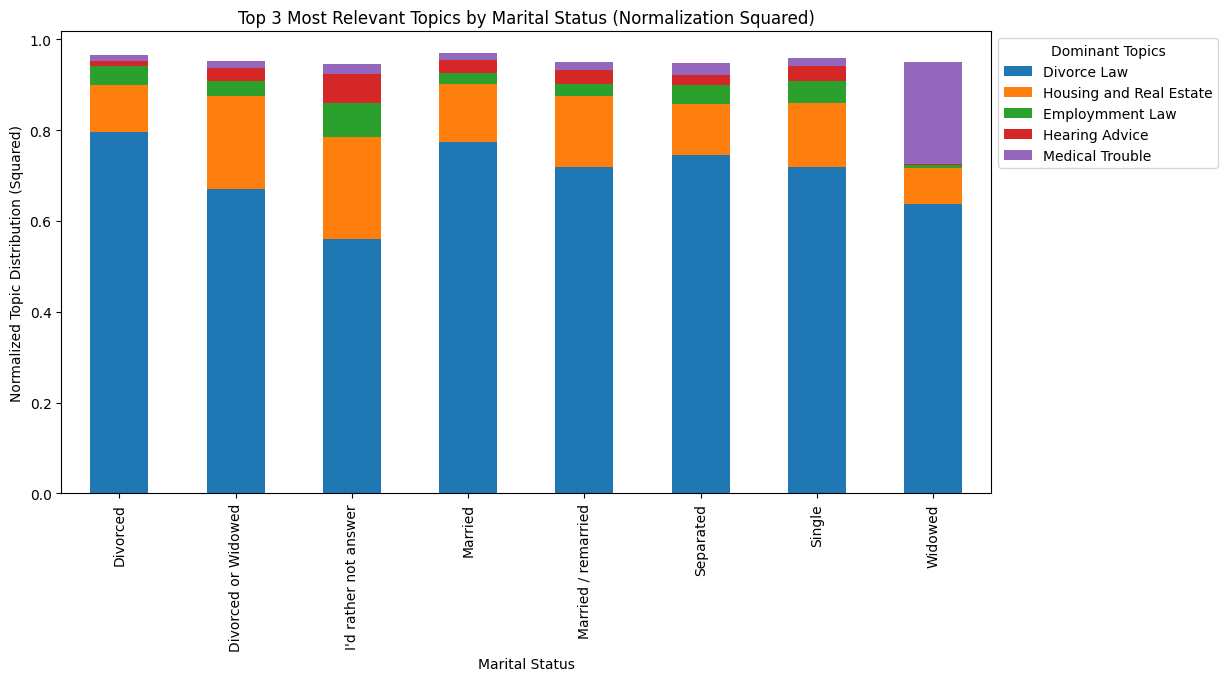

In [426]:
# Calculate the topic distribution by marital status
marital_status_topic_distribution = merged_df.groupby(['MaritalStatus', 'Topic_Label']).size().unstack(fill_value=0)

# Normalize the topic distribution by marital status
marital_status_topic_distribution_normalized = marital_status_topic_distribution.div(marital_status_topic_distribution.sum(axis=1), axis=0)

# Square the normalization
marital_status_topic_distribution_normalized_squared = marital_status_topic_distribution_normalized ** 6

marital_status_topic_distribution_normalized_squared = marital_status_topic_distribution_normalized_squared.div(marital_status_topic_distribution_normalized_squared.sum(axis=1), axis=0)


# Find the top 2 most relevant topics for each marital status
top2_topics_by_marital_status = marital_status_topic_distribution_normalized_squared.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Filter the original marital_status_topic_distribution_normalized_squared DataFrame to keep only the top 2 topics for each marital status
filtered_marital_status_topic_distribution_normalized_squared = marital_status_topic_distribution_normalized_squared[top2_topics_by_marital_status.apply(pd.Series).stack().unique()]

# Create a stacked bar plot for the top 2 most relevant topics by marital status with normalization squared
ax = filtered_marital_status_topic_distribution_normalized_squared.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Top 3 Most Relevant Topics by Marital Status (Normalization Squared)')
plt.xlabel('Marital Status')
plt.ylabel('Normalized Topic Distribution (Squared)')
plt.legend(title='Dominant Topics', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [427]:
# Group the merged_df DataFrame by Gender and MaritalStatus
grouped_by_gender_marital_status = merged_df.groupby(['Gender', 'MaritalStatus'])

# Count the number of questions for each combination
counts_by_gender_marital_status = grouped_by_gender_marital_status.size()

# Sort the counts in descending order
sorted_counts_by_gender_marital_status = counts_by_gender_marital_status.sort_values(ascending=False)

# Select the top 5 combinations
top5_combinations_gender_marital_status = sorted_counts_by_gender_marital_status.head(5)

# Create a DataFrame with the top 5 gender and marital status combinations by the number of questions asked
top5_gender_marital_status_df = top5_combinations_gender_marital_status.reset_index(name='Number_of_Questions')

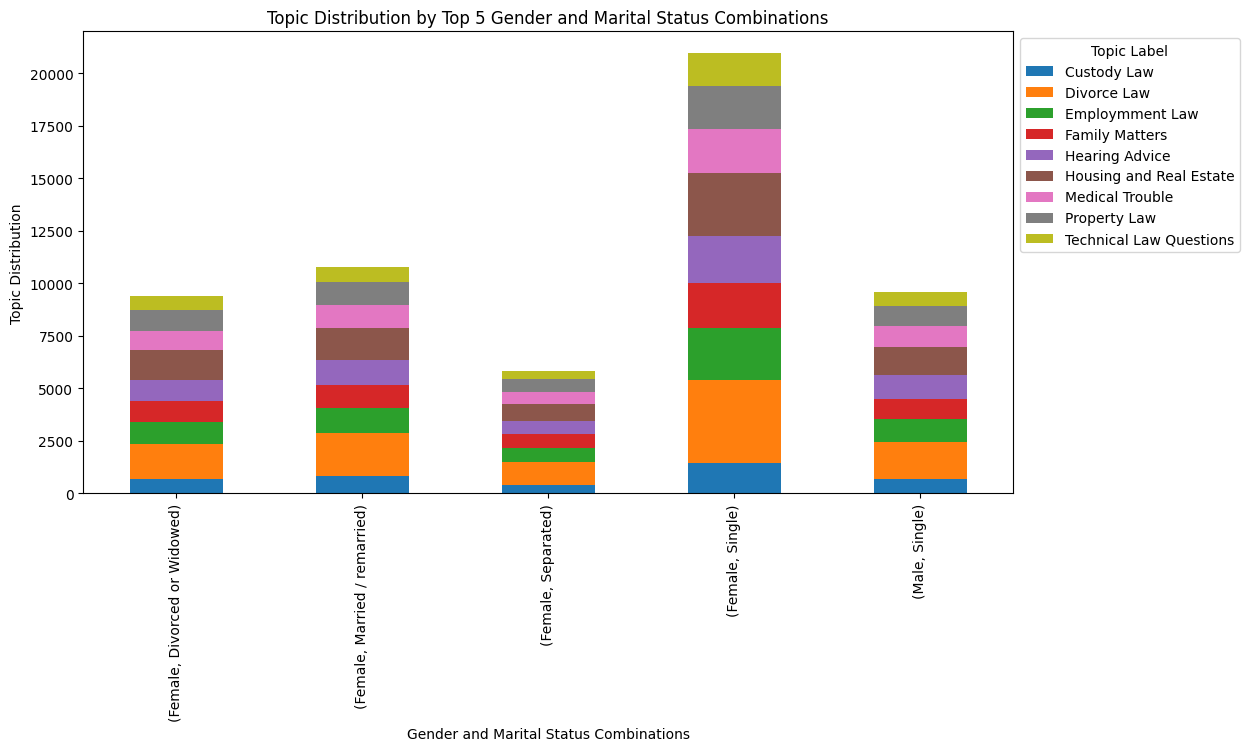

In [428]:
# Filter the merged_df DataFrame to include only rows with the top 5 gender and marital status combinations
filtered_df = merged_df[merged_df.apply(lambda row: (row['Gender'], row['MaritalStatus']) in top5_combinations_gender_marital_status.index, axis=1)]

# Group the filtered DataFrame by the gender, marital status, and topic label
grouped_by_top5_combinations = filtered_df.groupby(['Gender', 'MaritalStatus', 'Topic_Label'])

# Count the number of questions for each group
counts_by_top5_combinations = grouped_by_top5_combinations.size()

# Unstack the grouped data and fill any missing values with 0
counts_by_top5_combinations_unstacked = counts_by_top5_combinations.unstack(fill_value=0)


# Create a stacked bar plot for the topic distribution by the top 5 gender and marital status combinations
ax = counts_by_top5_combinations_unstacked.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Topic Distribution by Top 5 Gender and Marital Status Combinations')
plt.xlabel('Gender and Marital Status Combinations')
plt.ylabel('Topic Distribution')
plt.legend(title='Topic Label', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

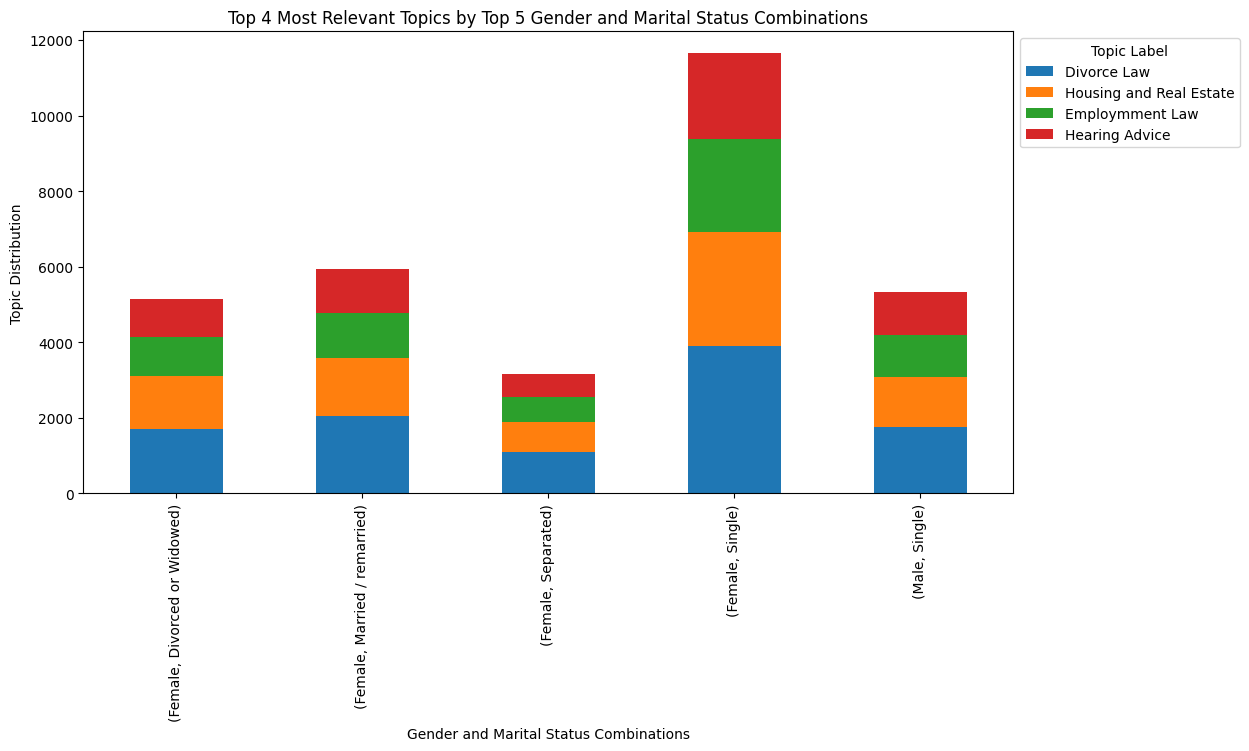

In [431]:
# Filter the merged_df DataFrame to include only rows with the top 5 gender and marital status combinations
filtered_df = merged_df[merged_df.apply(lambda row: (row['Gender'], row['MaritalStatus']) in top5_combinations_gender_marital_status.index, axis=1)]

# Group the filtered DataFrame by the gender, marital status, and topic label
grouped_by_top5_combinations = filtered_df.groupby(['Gender', 'MaritalStatus', 'Topic_Label'])

# Count the number of questions for each group
counts_by_top5_combinations = grouped_by_top5_combinations.size()

# Unstack the grouped data and fill any missing values with 0
counts_by_top5_combinations_unstacked = counts_by_top5_combinations.unstack(fill_value=0)


# Find the top 2 most relevant topics for each marital status
top2_topics_by_marital_status = counts_by_top5_combinations_unstacked.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Filter the original marital_status_topic_distribution_normalized_squared DataFrame to keep only the top 2 topics for each marital status
filtered_marital_status_topic_distribution_normalized_squared = counts_by_top5_combinations_unstacked[top2_topics_by_marital_status.apply(pd.Series).stack().unique()]

# Create a stacked bar plot for the topic distribution by the top 5 gender and marital status combinations
ax = filtered_marital_status_topic_distribution_normalized_squared.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Top 4 Most Relevant Topics by Top 5 Gender and Marital Status Combinations')
plt.xlabel('Gender and Marital Status Combinations')
plt.ylabel('Topic Distribution')
plt.legend(title='Topic Label', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

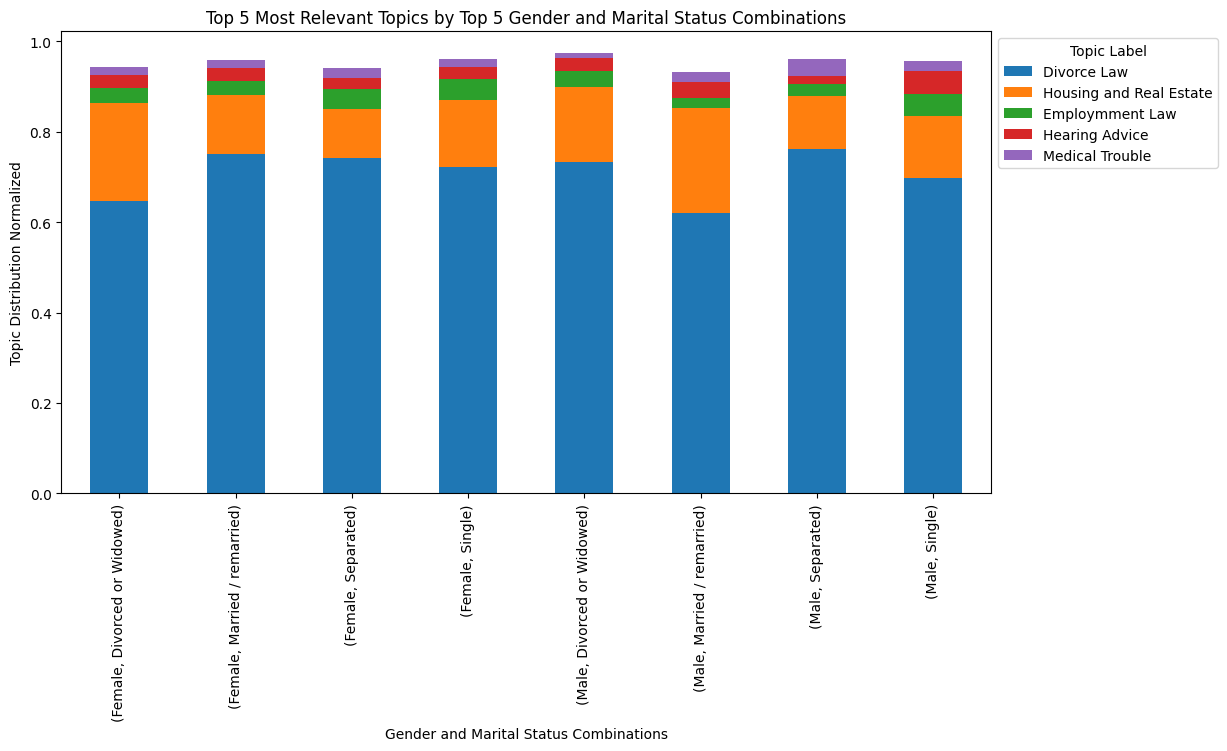

In [436]:
# Filter the merged_df DataFrame to include only rows with the top 5 gender and marital status combinations
top5_combinations_gender_marital_status = merged_df.groupby(['Gender', 'MaritalStatus']).size().nlargest(8)
filtered_df = merged_df[(merged_df['Gender'].isin(top5_combinations_gender_marital_status.index.get_level_values('Gender'))) & (merged_df['MaritalStatus'].isin(top5_combinations_gender_marital_status.index.get_level_values('MaritalStatus')))]

# Group the filtered DataFrame by the gender, marital status, and topic label
grouped_by_top5_combinations = filtered_df.groupby(['Gender', 'MaritalStatus', 'Topic_Label'])

# Count the number of questions for each group
counts_by_top5_combinations = grouped_by_top5_combinations.size().reset_index(name='Count')

# Pivot the table to make the Topic_Labels as columns and fill any missing values with 0
counts_by_top5_combinations_unstacked = counts_by_top5_combinations.pivot(index=['Gender', 'MaritalStatus'], columns='Topic_Label', values='Count').fillna(0)

counts_by_top5_combinations_unstacked_normalized = counts_by_top5_combinations_unstacked.div(counts_by_top5_combinations_unstacked.sum(axis=1), axis=0)

counts_by_top5_combinations_unstacked_normalized = counts_by_top5_combinations_unstacked_normalized ** 6
counts_by_top5_combinations_unstacked_normalized = counts_by_top5_combinations_unstacked_normalized.div(counts_by_top5_combinations_unstacked_normalized.sum(axis=1), axis=0)


top3_topics_by_marital_status = counts_by_top5_combinations_unstacked_normalized.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

filtered_marital_status_gender_topic_distribution_normalized_squared = counts_by_top5_combinations_unstacked_normalized[top3_topics_by_marital_status.apply(pd.Series).stack().unique()]

# Create a stacked bar plot for the topic distribution by the top 5 gender and marital status combinations
ax = filtered_marital_status_gender_topic_distribution_normalized_squared.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Top 5 Most Relevant Topics by Top 5 Gender and Marital Status Combinations')
plt.xlabel('Gender and Marital Status Combinations')
plt.ylabel('Topic Distribution Normalized')
plt.legend(title='Topic Label', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [437]:
from nrclex import NRCLex
# Filter the DataFrame to get rows with ClientQuestions
client_questions_df = qa_pairs[qa_pairs['Type'] == 'ClientQuestions']

# Analyze emotions in a series of texts
def analyze_emotions_series(series):
    emotion_dicts = [analyze_emotions(text) for text in series]
    
    emotion_df = pd.DataFrame(emotion_dicts)
    return emotion_df



In [438]:
# Analyze emotions in a single text
def analyze_emotions(text):
    emotions = NRCLex(text)
    return emotions.affect_frequencies

In [439]:

# Extract ClientQuestions from the filtered dataframe
client_questions = client_questions_df['PostText']

# Analyze emotions in ClientQuestions
emotions_df = analyze_emotions_series(client_questions)

In [440]:
# Add a column with the dominant emotion
emotions_df['DominantEmotion'] = emotions_df.idxmax(axis=1)

# Combine the emotions_df with the original client_questions_df
combined_df = pd.concat([client_questions_df.reset_index(drop=True), emotions_df.reset_index(drop=True)], axis=1)

In [441]:
combined_df.columns

Index(['ClientUno', 'Type', 'PostText', 'fear', 'anger', 'anticip', 'trust',
       'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy',
       'anticipation', 'DominantEmotion'],
      dtype='object')

In [442]:

# Assuming your DataFrame is named 'questions'
questions['AskedOnUtc'] = pd.to_datetime(questions['AskedOnUtc'])
questions['TakenOnUtc'] = pd.to_datetime(questions['TakenOnUtc'])



In [443]:
# Calculate response times in seconds
questions['ResponseTime'] = (questions['TakenOnUtc'] - questions['AskedOnUtc'])

In [444]:
questions['ResponseTime'] = questions['ResponseTime'] / np.timedelta64(1, 'D')
questions['ResponseTime'] 

0               NaN
1               NaN
2          2.111088
3         37.646458
4               NaN
            ...    
202874    29.948241
202875     3.584711
202876          NaN
202877     5.475127
202878          NaN
Name: ResponseTime, Length: 202879, dtype: float64

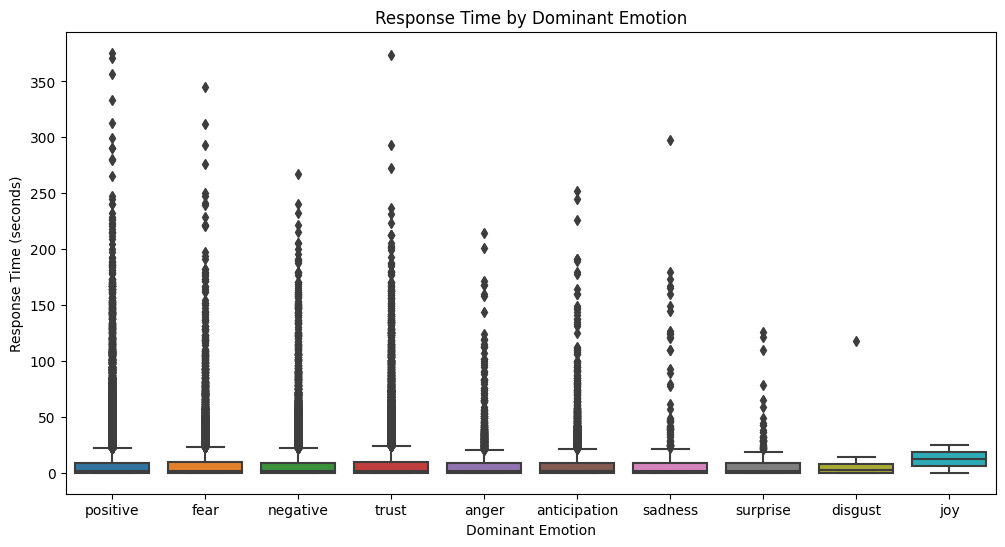

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the DataFrames
merged_df = pd.merge(questions, combined_df[combined_df['Type'] == 'ClientQuestions'], left_on='AskedByClientUno', right_on='ClientUno')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DominantEmotion', y='ResponseTime', data=merged_df)
plt.title('Response Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Response Time (seconds)')
plt.show()

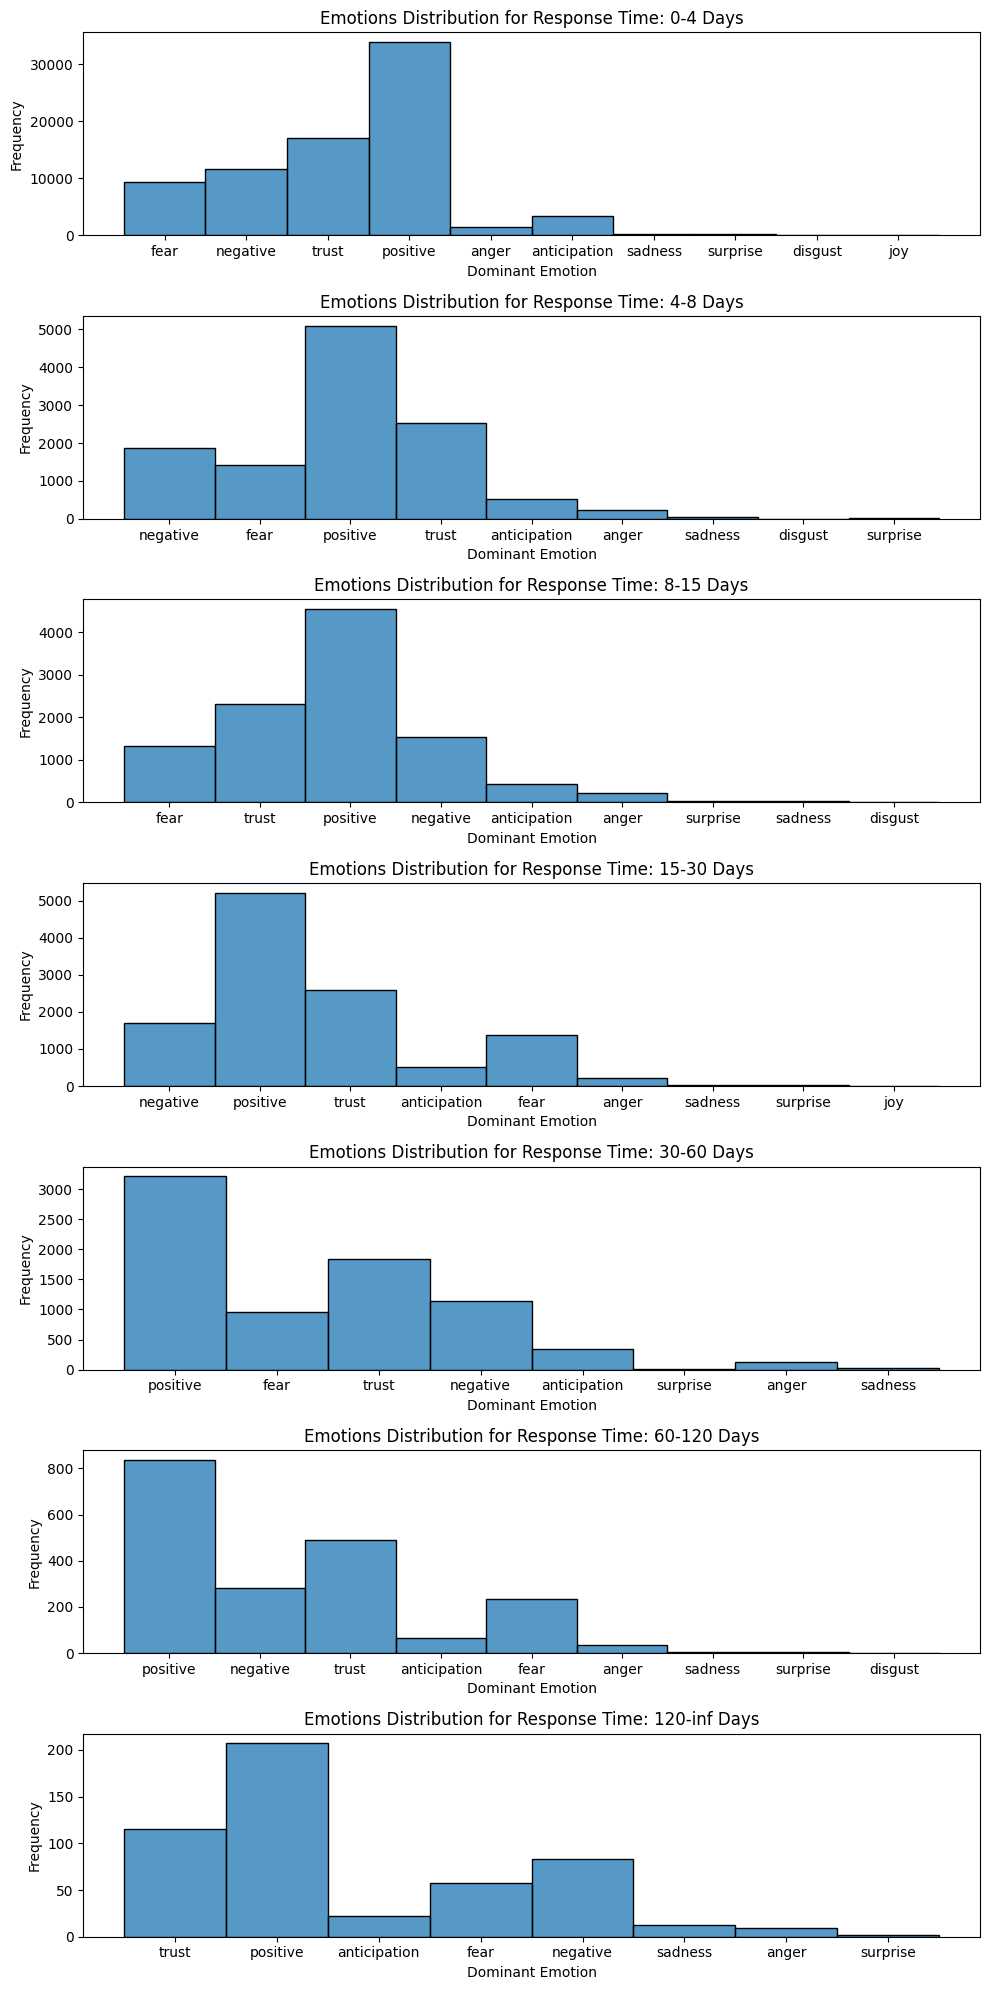

In [446]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the intervals
intervals = [(0, 4),(4, 8),(8, 15), (15, 30), (30, 60), (60, 120), (120, np.inf)]

# Merge the DataFrames
merged_df = pd.merge(questions, combined_df[combined_df['Type'] == 'ClientQuestions'], left_on='AskedByClientUno', right_on='ClientUno')

# Create a new column for the interval labels
merged_df['ResponseTime_Interval'] = pd.cut(merged_df['ResponseTime'], bins=[0,4,8, 15, 30, 60, 120,np.inf], labels=['0-4 Days','4-8 Days','8-15 Days','15-30 Days', '30-60 Days', '60-120 Days', '120 Days +'])

# Create a histogram for each interval
fig, axs = plt.subplots(len(intervals), figsize=(10, 20))

for i, interval in enumerate(intervals):
    interval_df = merged_df[(merged_df['ResponseTime'] >= interval[0]) & (merged_df['ResponseTime'] < interval[1])]
    sns.histplot(data=interval_df, x='DominantEmotion', ax=axs[i], discrete=True)
    axs[i].set_title(f"Emotions Distribution for Response Time: {interval[0]}-{interval[1]} Days")
    axs[i].set_xlabel('Dominant Emotion')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [455]:
questions_post_with_client_uno

merged_df = pd.merge(questions_post_with_client_uno, combined_df[combined_df['Type'] == 'ClientQuestions'], on='ClientUno')


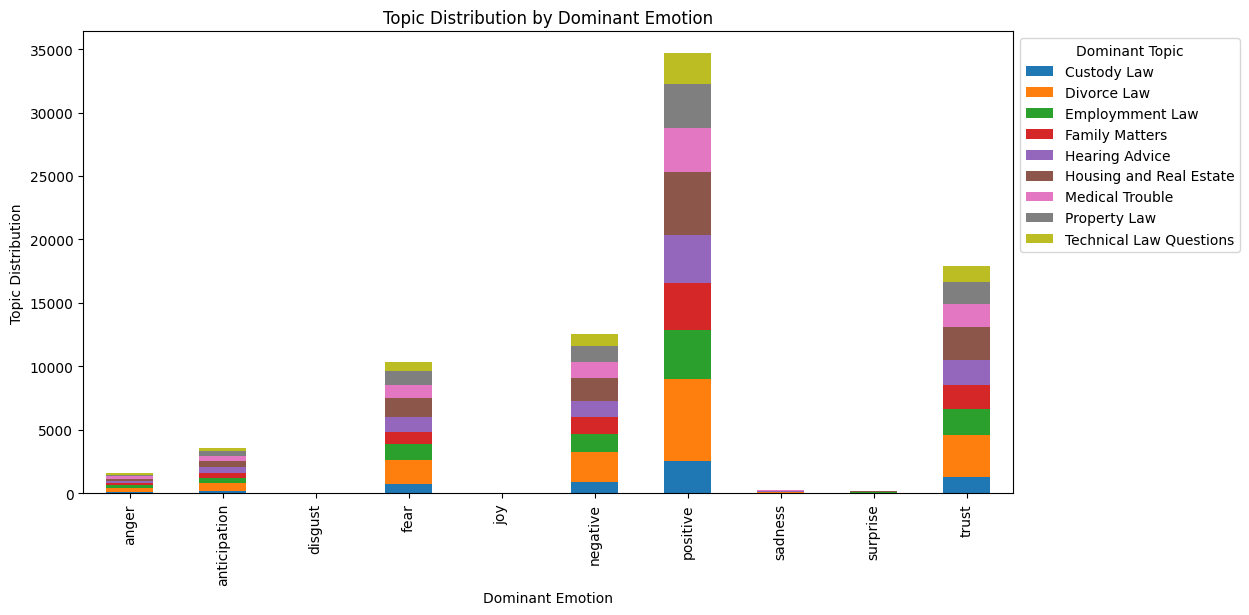

In [460]:
dominant_emotion_topic_distribution = merged_df.groupby(['DominantEmotion', 'Topic_Label']).size().unstack(fill_value=0)


# Create a bar plot for the topic distribution by marital status
ax = dominant_emotion_topic_distribution.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Topic Distribution by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Topic Distribution')
plt.legend(title='Dominant Topic', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

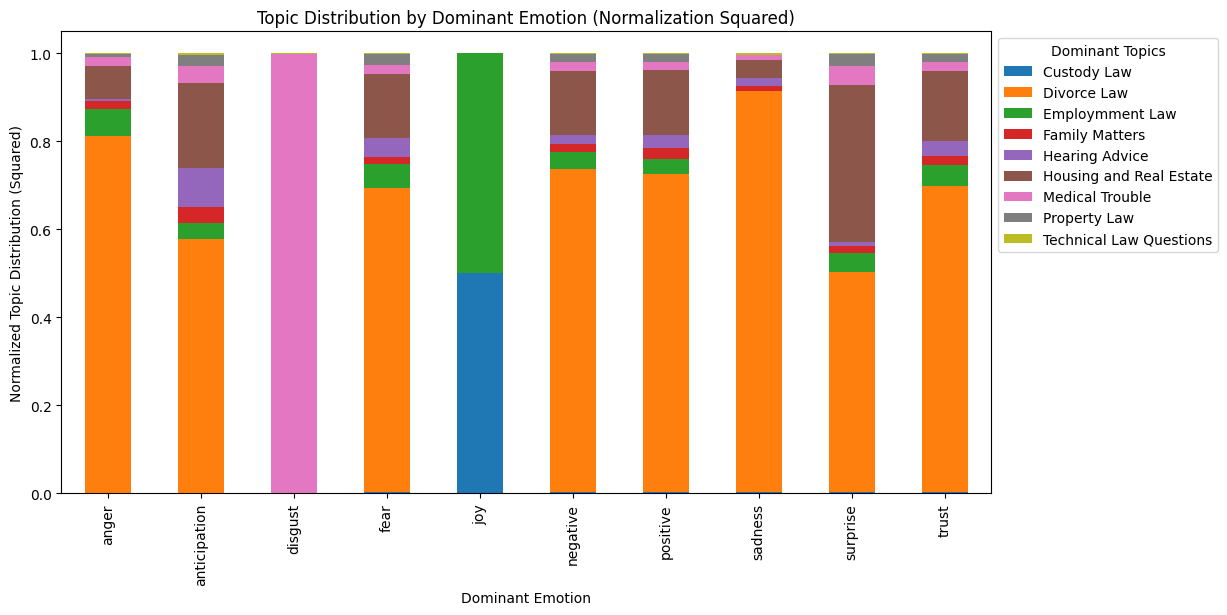

In [459]:
# Calculate the topic distribution by marital status
dominant_emotion_topic_distribution = merged_df.groupby(['DominantEmotion', 'Topic_Label']).size().unstack(fill_value=0)

# Normalize the topic distribution by marital status
dominant_emotion_topic_distribution_normalized = dominant_emotion_topic_distribution.div(dominant_emotion_topic_distribution.sum(axis=1), axis=0)

# Square the normalization
dominant_emotion_topic_distribution_normalized_squared = dominant_emotion_topic_distribution_normalized ** 6

dominant_emotion_topic_distribution_normalized_squared = dominant_emotion_topic_distribution_normalized_squared.div(dominant_emotion_topic_distribution_normalized_squared.sum(axis=1), axis=0)


# Create a stacked bar plot for the top 2 most relevant topics by marital status with normalization squared
ax = dominant_emotion_topic_distribution_normalized_squared.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Topic Distribution by Dominant Emotion (Normalization Squared)')
plt.xlabel('Dominant Emotion')
plt.ylabel('Normalized Topic Distribution (Squared)')
plt.legend(title='Dominant Topics', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

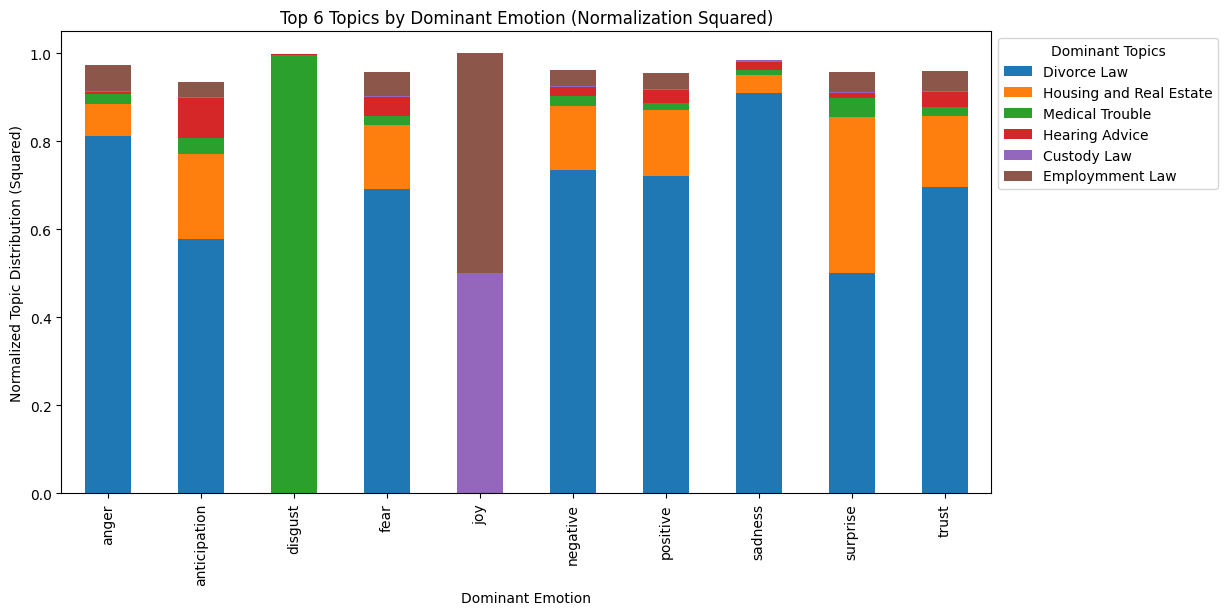

In [467]:
# Calculate the topic distribution by marital status
dominant_emotion_topic_distribution = merged_df.groupby(['DominantEmotion', 'Topic_Label']).size().unstack(fill_value=0)

# Normalize the topic distribution by marital status
dominant_emotion_topic_distribution_normalized = dominant_emotion_topic_distribution.div(dominant_emotion_topic_distribution.sum(axis=1), axis=0)

# Square the normalization
dominant_emotion_topic_distribution_normalized_squared = dominant_emotion_topic_distribution_normalized ** 6

dominant_emotion_topic_distribution_normalized_squared = dominant_emotion_topic_distribution_normalized_squared.div(dominant_emotion_topic_distribution_normalized_squared.sum(axis=1), axis=0)

# Find the top 2 most relevant topics for each marital status
top3_topics_by_dominant_emotion = dominant_emotion_topic_distribution_normalized_squared.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)

# Filter the original marital_status_topic_distribution_normalized_squared DataFrame to keep only the top 2 topics for each marital status
filtered_dominant_emotion_topic_distribution_normalized_squared = dominant_emotion_topic_distribution_normalized_squared[top3_topics_by_dominant_emotion.apply(pd.Series).stack().unique()]

# Create a stacked bar plot for the top 2 most relevant topics by marital status with normalization squared
ax = filtered_dominant_emotion_topic_distribution_normalized_squared.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Top 6 Topics by Dominant Emotion (Normalization Squared)')
plt.xlabel('Dominant Emotion')
plt.ylabel('Normalized Topic Distribution (Squared)')
plt.legend(title='Dominant Topics', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()